# II. Descriptive Analysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Downloads/PyQuesters_Python_Hackathon/HUPA-UC Diabetes Dataset
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"
print(demographic_path)


HUPA-UC Diabetes Dataset/T1DM_patient_sleep_demographics_with_race.csv


***Q1: How many participants in the dataset have diabetes, and what is their percentage?***  
*Reasoning:*
*Since understanding the prevalence of diabetes is key to this analysis, examining the proportion of 
participants with the condition helps contextualize the population.*

In [ ]:

# Load the merged patient and demographic dataset

df = pd.read_csv(patients_demographic_path)
# ---------------------------
# Step 1: Unique participants by gender
# ---------------------------
gender_counts = df.groupby('patient_id')['gender'].first().value_counts()
gender_percent = gender_counts / gender_counts.sum() * 100

print("Number of participants by gender:")
print(gender_counts)
print("\nPercentage of participants by gender:")
print(gender_percent.round(2))

# Gender comparison
if gender_counts.get('Female', 0) > gender_counts.get('Male', 0):
    print("\nFemale participants are higher in number.")
elif gender_counts.get('Male', 0) > gender_counts.get('Female', 0):
    print("\nMale participants are higher in number.")
else:
    print("\nNumber of male and female participants are equal.")

# ---------------------------
# Step 2: Identify diabetic participants
# ---------------------------
# Example threshold: max glucose >= 126 mg/dL considered diabetic
diabetic_patients = df.groupby('patient_id')['glucose'].max()
diabetic_patients = diabetic_patients[diabetic_patients >= 126]

print("\nNumber of diabetic participants:", len(diabetic_patients))
print("Percentage of total participants:", 
      round(len(diabetic_patients)/df['patient_id'].nunique()*100, 2))

# ---------------------------
# Step 3: Gender-wise distribution of diabetic participants
# ---------------------------
# Merge with gender information
gender_info = df[['patient_id', 'gender']].drop_duplicates()
diabetic_gender = gender_info[gender_info['patient_id'].isin(diabetic_patients.index)]
diabetic_gender_counts = diabetic_gender['gender'].value_counts()
diabetic_gender_percent = diabetic_gender_counts / diabetic_gender_counts.sum() * 100

print("\nDiabetic participants by gender:")
print(diabetic_gender_counts)
print("\nPercentage of diabetic participants by gender:")
print(diabetic_gender_percent.round(2))



***Q2: How does heart rate correlate with physical activity (steps) across patients?***    
*Reasoning: Understanding the relationship between heart rate and physical activity helps assess cardiovascular fitness and activity patterns in diabetes patients, which is crucial for comprehensive health monitoring.*

In [ ]:
print("HEART RATE vs PHYSICAL ACTIVITY ANALYSIS")
print("=" * 50)

# Step 1: Load and examine the data
print(f"Total records in dataset: {len(df):,}")
print(f"Heart rate range: {df['heart_rate'].min():.0f} - {df['heart_rate'].max():.0f} bpm")
print(f"Steps range: {df['steps'].min():.0f} - {df['steps'].max():.0f} steps")

# Step 2: Filter out inactive periods (zero steps) and Create a subset with only active periods (steps > 0)
active_data = df[df['steps'] > 0].copy()
print(f"Records with activity (steps > 0): {len(active_data):,}")
print(f"Records with no activity (steps = 0): {len(df) - len(active_data):,}")
print(f"Percentage of time patients were active: {len(active_data)/len(df)*100:.1f}%")

# Step 3: Calculate the correlation between heart rate and steps
print("\nCalculating correlation between heart rate and steps")
correlation = active_data['heart_rate'].corr(active_data['steps'])

# Interpret the result
if correlation > 0.7:
    strength = "Strong positive"
elif correlation > 0.3:
    strength = "Moderate positive"
elif correlation > 0.1:
    strength = "Weak positive"
elif correlation > -0.1:
    strength = "Very weak"
elif correlation > -0.3:
    strength = "Weak negative"
else:
    strength = "Moderate to strong negative"

print(f"Result: {strength} correlation")

# Step 4: Compare heart rate during activity vs rest
print("\nComparing heart rate during activity vs rest")

hr_active = active_data['heart_rate'].mean()
hr_rest = df[df['steps'] == 0]['heart_rate'].mean()
hr_difference = hr_active - hr_rest

print(f" - Average heart rate during activity: {hr_active:.1f} bpm")
print(f" - Average heart rate during rest: {hr_rest:.1f} bpm")
print(f" - Heart rate increase during activity: {hr_difference:.1f} bpm")

if hr_difference > 20:
    print("Result: Significant heart rate response to activity (good cardiovascular response)")
elif hr_difference > 10:
    print("Result: Moderate heart rate response to activity")
else:
    print("Result: Minimal heart rate response to activity (may indicate fitness or medication effects)")


***Q3: What is the distribution of calorie expenditure and how does it vary throughout the day?***    
*Reasoning: Calorie expenditure patterns reveal daily activity rhythms and metabolic patterns, helping understand energy balance in diabetes patients and optimize meal timing and insulin delivery.*

In [ ]:
print("\n\nDistribution of Calorie Expenditure")
print("-" * 60)

# Ensure time column is datetime (optional if not needed for this)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Basic stats
print(df['calories'].describe().round(2))

# Plot distribution
plt.figure(figsize=(8,5))
plt.hist(df['calories'], bins=30, color='skyblue', edgecolor='black')
plt.title('Calorie Expenditure Distribution')
plt.xlabel('Calories (per 5-min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


 ***Q4: How does average glucose vary across age groups?***
*Reasoning: Blood sugar levels can change with age. Older people may have different patterns compared to younger ones. Finding these differences helps identify which age groups may need extra support or care.*


In [ ]:
#Create age groups 
age_bins = [10,20,30,40,50,60,70,80]
age_labels = ['11-20','21-30','31-40','41-50','51-60','61-70','71-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

#Calculate average glucose by age group
avg_glucose_by_age = df.groupby('age_group', observed=False)['glucose'].mean().reset_index()
print(avg_glucose_by_age)

#Plot the results(bar chart)
avg_glucose_by_age.plot(kind='bar', x='age_group', y='glucose', color='skyblue', legend=False, figsize=(10,6))
plt.title("Average Glucose by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()


***Q5: What is the impact of carbohydrate intake on glucose spikes?***
*Reasoning: Higher carbohydrate intake usually increases blood sugar levels. This analysis helps to see how glucose changes with carb intake.*

In [ ]:
# Create carb intake bins
carb_bins = [0, 25, 50, 75, 100, 150]  
carb_labels = ['0-25', '26-50', '51-75', '76-100', '101-150', '151-200']

#  Create carb intake bins
carb_bins = [0, 25, 50, 75, 100, 150]  
carb_labels = ['0-25', '26-50', '51-75', '76-100', '101-150']

df['carb_group'] = pd.cut(df['carb_input'], bins=carb_bins, labels=carb_labels)

# Calculate average glucose by carb group
avg_glucose_by_carb = df.groupby('carb_group', observed=False)['glucose'].mean().reset_index()

# Plot
avg_glucose_by_carb.plot(
    kind='bar',
    x='carb_group',
    y='glucose',
    color='orange',
    legend=False,
    figsize=(10,6)
)

plt.title("Impact of Carbohydrate Intake on Glucose Levels")
plt.xlabel("Carbohydrate Intake (grams)")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()

***Q6: How does glucose vary by sleep quality?***
*Reasoning: Poor sleep quality is often linked to higher blood sugar. By comparing glucose levels across different sleep quality groups, we can see if sleep problems affect blood sugar control.*

In [ ]:
# Scatter plot: glucose vs sleep quality
plt.figure(figsize=(8,6))
sns.scatterplot(x='sleep_quality_score', y='glucose', data=df, alpha=0.3)
plt.title('Glucose vs Sleep Quality Score')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.show()

# Regression line to show trend
plt.figure(figsize=(8,6))
sns.regplot(x='sleep_quality_score', y='glucose', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Glucose vs Sleep Quality Score with Trend Line')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.show()

**Q7 Problem Statement : Compare overnight and daytime glucose levels across patients per day**

**Reasoning: Overnight (midnight–5 AM) glucose reflects basal insulin and fasting state. 
             and Daytime glucose is influenced by meals,activity,stress and bolus insulin.
             Comparing these two periods helps clinical assess whether insulin delivery(basal/bolus) or                          lifestyle modificiations like diet,exercise are effective**

In [34]:
# Create patients_df dataframe by reading ALLPATIENTS.csv file
patients_df = pd.read_csv(all_patients_path, parse_dates=["time"])
patients_df.columns

Index(['time', 'glucose', 'calories', 'heart_rate', 'steps', 'basal_rate',
       'bolus_volume_delivered', 'carb_input', 'patient_id',
       'basal_rate_cleaned'],
      dtype='object')

In [35]:
# Steps:
# Create seperate dataframes for daytime and overnight dataset
# daytime_df: This dataframe contains avg glucose values taken during the daytime per patient per day.
# columns are:
#patient id: Patient Id
#date part from time column: This column used to join the overnight dataset to get avgerage of glucose values recorded during overnight on that day 
#is_daytime: This column identifies the at what day part the glucose reading is recorded
#daytime_avg_glucose: This column has a avg glucose value for all records in daytime period on a single day

#------------------------------------------------------------
#Adding extra date column while grouping for daytime
#Extracting all glucose values for the 
# daytime[from 6am till 12am] grouping by patient_id and date
#-------------------------------------------------------------
daytime_df = patients_df.assign(date=patients_df['time'].dt.date,is_daytime = patients_df['time'].dt.hour.between(6,23)).groupby(['patient_id','date','is_daytime'])['glucose'].mean().reset_index()
#------------------------------------------------------------
# Delete all rows having is_daytime == False ie records other 
# than daytime
#------------------------------------------------------------
daytime_df=daytime_df[daytime_df['is_daytime']==True]
#------------------------------------------------------------
# rename the glucose column with daytime_avg_glucose
# renaming to clean join with the overnight dataframe
#------------------------------------------------------------
daytime_df=daytime_df.rename(columns={'glucose':'daytime_avg_glucose'})
#------------------------------------------------------------
# Number of patients having records during daytime
#------------------------------------------------------------
print('Total number of patients having records during daytime: ' , daytime_df['patient_id'].nunique())
#------------------------------------------------------------
# Number of days having records during midnight
#------------------------------------------------------------
print('Total number of days on which glucose has recorded during daytime:', daytime_df['date'].nunique())

#------------------------------------------------------------
# Adding extra date column while grouping for daytime
# Extracting all glucose values for the daytime[from midnight till 6am] grouping by patient_id and date
#------------------------------------------------------------
overnight_df= patients_df.assign(date=patients_df['time'].dt.date,is_overnight = patients_df['time'].dt.hour.between(0,5)).groupby(['patient_id','date','is_overnight'])['glucose'].mean().reset_index()
#overnight_df
#------------------------------------------------------------
# Delete all rows having is_daytime == False ie records other than daytime
#------------------------------------------------------------
overnight_df=overnight_df[overnight_df['is_overnight']==True]
#------------------------------------------------------------
# rename the glucose column with daytime_avg_glucose
# renaming to clean join with the overnight dataframe
#------------------------------------------------------------
overnight_df = overnight_df.rename(columns={'glucose':'overnight_avg_glucose'})
#overnight_df.count()
#overnight_df
#------------------------------------------------------------
# Number of patients having records during overnight
#------------------------------------------------------------
print('Total number of patients having records during overnight: ' , overnight_df['patient_id'].nunique())
#------------------------------------------------------------
# Number of days having records during midnight
#------------------------------------------------------------
print('Total number of days on which glucose has recorded during overnight:', overnight_df['date'].nunique())

#------------------------------------------------------------
# Join two df on patient_id and date 
#------------------------------------------------------------
result_df = pd.merge(daytime_df, overnight_df, on = ['patient_id','date'], how="inner") #,suffixes=('_daytime_avg_','_overnight_avg_'))
#------------------------------------------------------------
# Rounding avg glucose values to 1
#------------------------------------------------------------
result_df = result_df.round({
    'daytime_avg_glucose':1,
    'overnight_avg_glucose':1
})
result_df['date'].nunique()
result_df['patient_id'].nunique()
#------------------------------------------------------------
# Number of patients having records during overnight and daytime on the same day
#------------------------------------------------------------
print('Total number of patients having records during overnight: ' , result_df['patient_id'].nunique())
#------------------------------------------------------------
# Number of days having records during midnight and daytime
#------------------------------------------------------------
print('Total number of days on which glucose has recorded during overnight:', result_df['date'].nunique())
#result_df.columns
#------------------------------------------------------------
# Number of records during overnight and daytime on the same day for a patient
#------------------------------------------------------------
print('Total number records during overnight and daytime on the same day for a patient:', len(result_df))

result_df[['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']]


#------------------------------------------------------------
# Find the patients having less difference between 
# DayTime and Overnight average glucose values
#------------------------------------------------------------
result_df['diff'] = (result_df['daytime_avg_glucose'] - result_df['overnight_avg_glucose']).abs()
#------------------------------------------------------------
# Patients having the minimum difference in daytime and overnight avg glucose reading per day
#------------------------------------------------------------
min_diff_index = result_df['diff'].idxmin()
print('------------------------------------------------------------------------------------------')
print('Patient having the minimum difference in daytime and overnight avg glucose reading day:')
print(result_df.loc[min_diff_index,['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']])
print('------------------------------------------------------------------------------------------')
#------------------------------------------------------------
# Patients having the maximum difference in daytime and overnight avg glucose reading per day
#------------------------------------------------------------
max_diff_index = result_df['diff'].idxmax()
print('Patient having the maximum difference in daytime and overnight avg glucose reading day:')
print(result_df.loc[max_diff_index,['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']])

#------------------------------------------------------------
# Patients getting spice in glucose values between 20 -50 units in daytime and overnight avg glucose reading per day
#------------------------------------------------------------
#max_diff_index = result_df['diff'].idxmax()
#print('Patient having the maximum difference in daytime and overnight avg glucose reading day:')
#print(result_df.loc[max_diff_index,['patient_id','date','daytime_avg_glucose','overnight_avg_glucose']])

#------------------------------------------------------------
# Number of Patients having lower overnight reading than daytime reading 
# Generally these paitents are non-diabetic or well-controlled diabetic patients
#------------------------------------------------------------
rows = result_df.loc[result_df['daytime_avg_glucose']>= result_df['overnight_avg_glucose'],
['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('------------------------------------------------------------------------------------------')
print('Number of Patients with overnight avgerage glucose lower than \nor equal to the daytime glucose reading per day: ',len(rows))
print('Generally these paitents are non-diabetic or well-controlled diabetic patients')
print('------------------------------------------------------------------------------------------')
# rows.reset_index(drop=True)
#result_df
#------------------------------------------------------------
# Number of Patients with overnight avgerage glucose greater than 
# the daytime avg glucose reading by 50 mg/dLper day
# Difference more than 50mg/dL indicates risk of Hypoglycemia overnight
#------------------------------------------------------------
rows = result_df.loc[((result_df['daytime_avg_glucose']+50) < (result_df['overnight_avg_glucose'])),
['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('Number of Patients with overnight avgerage glucose greater than \nthe daytime avg glucose reading by 50 mg/dLper day: ',len(rows))
print('Difference more than 50mg/dL indicates risk of Hypoglycemia overnight')
print('------------------------------------------------------------------------------------------')

#------------------------------------------------------------
# Number of patients whose overnight average glucose is greater than daytime glucose 
# by more than 20 mg/dL but less than 50 mg/dL per day.
# A difference of ~20–50 mg/dL is often reasonable;
#------------------------------------------------------------

rows = result_df.loc[(
        (result_df['overnight_avg_glucose']>result_df['daytime_avg_glucose'])&
        (result_df['overnight_avg_glucose'] - result_df['daytime_avg_glucose'] >=20 )&
        (result_df['overnight_avg_glucose'] - result_df['daytime_avg_glucose'] <=50 )),
        ['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('Number of patients whose overnight average glucose is greater than daytime glucose \nby more than 20 mg/dL but less than 50 mg/dL per day: ',len(rows))
print('A difference of ~20–50 mg/dL is often reasonable')
print('------------------------------------------------------------------------------------------')
#------------------------------------------------------------
# Number of patients whose overnight average glucose is greater than daytime glucose 
# by less than 20 mg/dL per day
# A difference less than 20mg/dL is reasonable
#------------------------------------------------------------

rows = result_df.loc[(
        (result_df['overnight_avg_glucose']>result_df['daytime_avg_glucose'])&
        (result_df['overnight_avg_glucose'] - result_df['daytime_avg_glucose'] <20 )),
        ['patient_id','date','overnight_avg_glucose', 'daytime_avg_glucose']]
print('Number of patients whose overnight average glucose is greater than daytime glucose \nby less than 20 mg/dL per day: ',len(rows))
print('A difference less than 20mg/dL is reasonable')
print('\n**********Exact values can vary based on age, medications, and clinical recommendations.**********')

Total number of patients having records during daytime:  25
Total number of days on which glucose has recorded during daytime: 800
Total number of patients having records during overnight:  25
Total number of days on which glucose has recorded during overnight: 792
Total number of patients having records during overnight:  25
Total number of days on which glucose has recorded during overnight: 792
Total number records during overnight and daytime on the same day for a patient: 1071
------------------------------------------------------------------------------------------
Patient having the minimum difference in daytime and overnight avg glucose reading day:
patient_id                HUPA0028P
date                     2022-04-22
daytime_avg_glucose           106.1
overnight_avg_glucose         106.1
Name: 1044, dtype: object
------------------------------------------------------------------------------------------
Patient having the maximum difference in daytime and overnight avg glucos

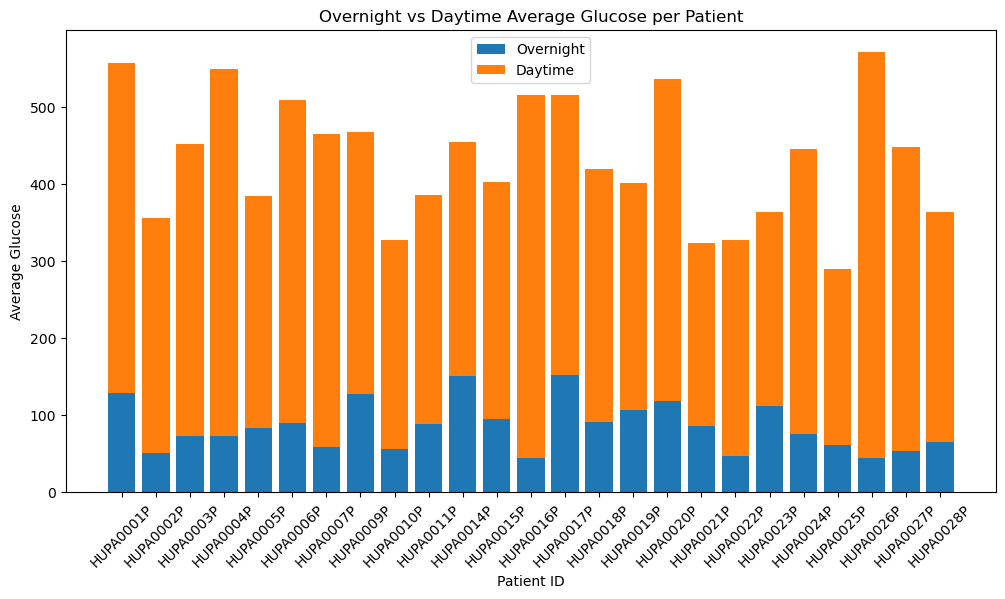

In [36]:

#Ploting grpah 
#It is taking a min and max values 
plt.figure(figsize=(12,6))
plt.bar(result_df['patient_id'], result_df['overnight_avg_glucose'], label='Overnight')
plt.bar(result_df['patient_id'], result_df['daytime_avg_glucose'], bottom=result_df['overnight_avg_glucose'], label='Daytime')
plt.xlabel("Patient ID")
plt.ylabel("Average Glucose")
plt.title("Overnight vs Daytime Average Glucose per Patient")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**melt reshapes your DataFrame from wide format → long format.**  

**In wide format, ie. [result_df]  each patient-date has two separate columns for glucose. That’s harder to plot directly.**

**In long format,[pivot_df] both readings are stacked into a single avg_glucose column with a label (time_type) saying if it’s daytime or overnight.**

In [38]:
# reshape into long format
plot_df = result_df.melt(
    id_vars=["patient_id", "date"],
    value_vars=["daytime_avg_glucose", "overnight_avg_glucose"],
    var_name="time_type", value_name="avg_glucose"
)

**InPlot**  

**x="date" → x-axis = date**  

**y="avg_glucose" → bar height = glucose value**  

**hue="time_type" → separate colors for day vs. night**  


<Figure size 1400x600 with 0 Axes>

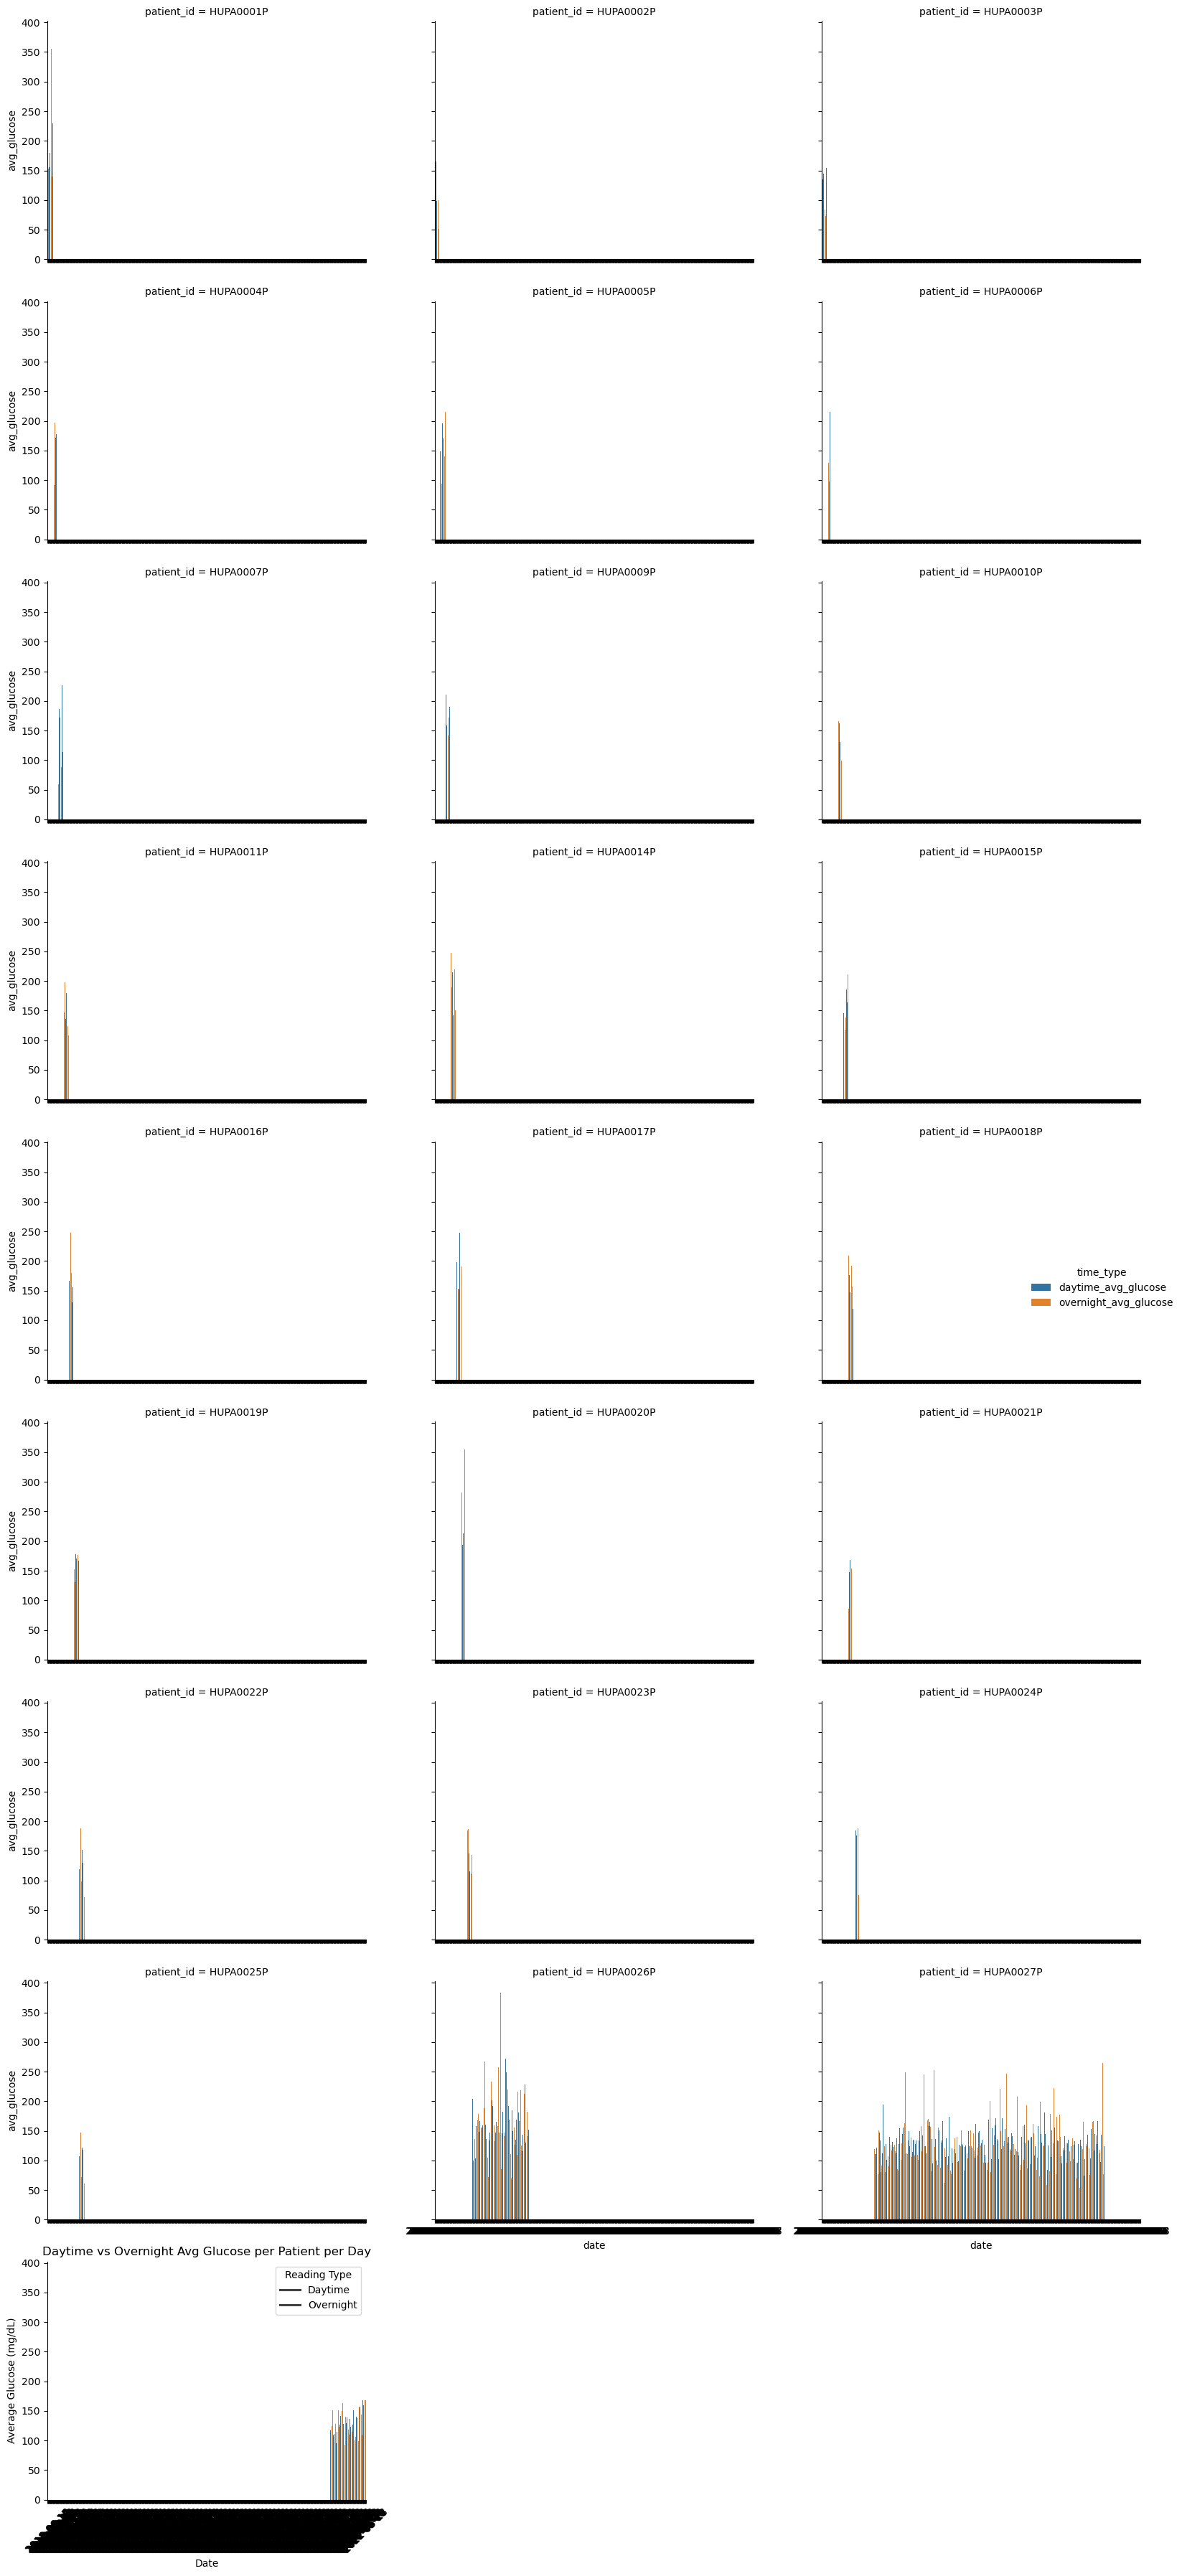

In [39]:
plt.figure(figsize=(14,6))
sns.catplot(
    data=plot_df,         # the DataFrame you are plotting
    x="date", y="avg_glucose",   # what goes on x-axis and y-axis
    hue="time_type",      # separate bars/colors for Daytime vs Overnight
    kind="bar",           # bar chart (can be 'point', 'box', 'violin', etc.)
    col="patient_id",     # separate chart (facet) for each patient
    col_wrap=3,           # wrap charts into rows of 3 plots each
    height=4, aspect=1.2  # control size of each small chart
)
plt.title("Daytime vs Overnight Avg Glucose per Patient per Day")
plt.xlabel("Date")
plt.ylabel("Average Glucose (mg/dL)")
plt.xticks(rotation=45)
plt.legend(title="Reading Type", labels=["Daytime", "Overnight"])
plt.tight_layout()
plt.show()


<pre><strong>Q8: Descriptive and Time-Series Analysis with clinical interpretation.
calculate the HbA1c levels for each patient. 
HbA1c should be estimated based on the average glucose over 3 consecutive months. 
In this analysis, only the patients who have complete data for 3 consecutive months are considered for the years 2020-2022. 
Formula used to calculate HbA1c is: 
    hb1ac = (mean_glucose + 46.7) / 28.7
The analysis also identifies the  patients with elevated HbA1c (>6.4%) 
and provides furthur insights through comparisons based on demographic factors like gender, age, and race.</string></pre>

In [43]:
# Make a temparay copy of patients df 
temp_df = patients_df.copy()
temp_df['year'] = temp_df['time'].dt.year
temp_df['month'] = temp_df['time'].dt.month
temp_df = temp_df.loc[:,['patient_id','year','month','glucose']]

# For caluclating hbA1c,average glucose values per month is required 
# So calculated the mean glucose by grouping with the patientid, year and month
temp_df = temp_df.groupby(['patient_id','year','month'])['glucose'].mean().reset_index()

# Extract the month count per patients per year during witch glucose data is available
month1_cnt_df = temp_df.groupby(['patient_id'])['month'].count().reset_index(name='month_cnt')
# Delete the records not having glucose reading for consecutive three months to calculate HbA1c
month1_cnt_df = month1_cnt_df[month1_cnt_df['month_cnt']>2]

# Merge this total number of months per patient with dataframe having mean glucose
temp1_df = pd.merge(temp_df[['patient_id','month','glucose','year']],month1_cnt_df[['patient_id','month_cnt']],on=['patient_id'], how="inner")
temp1_df.sort_values(by = ['patient_id','year','month'])

# Calculate Hb1Ac from above dataframe
# Create HbA1c list. 
# for loop iterate all the rows of the dataframe with step of 3 rows 
# Check if the month has list of 3 element
# Check all rows are of a single patient
# Handle the year boundaries ie if the records of Dec-2020 to Feb-2021
# By converting year and month into continous number
# Check if months are consecutive
# If all conditions are passed, then append the record into the list
# After iterating all the rows convert list of hBA1c into dataframe 
HbA1c = []

for i in range(0,len(temp1_df),3):
    avg_glucose=0
    df_month = temp1_df.iloc[i:i+3]
    if len(df_month)==3:
        patient_ids = df_month['patient_id'].unique()
        years = df_month['year'].unique()
        months = df_month['month'].sort_values().to_list()
          # Check if all rows belong to same patient + year
        if len(patient_ids) == 1: 
         # Convert year + month into continuous number
         # to handle year boundaries and check for consecutive months properly.
            month_nums = df_month['year'] * 12 + df_month['month']
            month_nums_sorted = month_nums.sort_values().to_list()

            # Check if months are consecutive
            if month_nums_sorted[2] - month_nums_sorted[0] == 2:  #and sorted(months) == months:
                mean_glucose = df_month['glucose'].mean()
                hb1ac = (mean_glucose + 46.7) / 28.7
                HbA1c.append({
                    'patient_id': patient_ids[0],
                    'year': years[0],
                    'months': months,
                    'mean_glucose': mean_glucose,
                    'HbA1c': hb1ac
                })
                i=i+3
            else:
                i+=1
        else:
            i+=1
HbA1c_df = pd.DataFrame(HbA1c)
# Round mean_glucose and HbA1c to 1
HbA1c_df= HbA1c_df.round({'mean_glucose':1,'HbA1c':1})


# Total number of patients whose data permits calculation of HbA1c
print('Total number of patients whose data permits calculation of HbA1c for the years 2020-2022')
print(HbA1c_df['patient_id'].nunique())
print('-----------------------------------------------')

#Diabetic
# Number of patients diagnosed with diabetes [having HbA1c > 6.4]
print("Number of patients diagnosed with diabetes [having HbA1c > 6.4]")
print(HbA1c_df.loc[HbA1c_df['HbA1c']>=6.4,'patient_id'].nunique())
print('-----------------------------------------------')

#Prediabetic/High risk
# Number of patients who are on hign risk 
print('Number of patients who are on hign risk having [6.4 > Hb1Ac > 5.7] ')
print(HbA1c_df.loc[((HbA1c_df['HbA1c']<6.4) & (HbA1c_df['HbA1c']>5.7)),'patient_id'].nunique())
print('-----------------------------------------------')

# Normal / Non diabetic
# Number of patients are non diabetic
print('Number of patients are non diabetic [Hb1Ac< 5.7]')
print(HbA1c_df.loc[(HbA1c_df['HbA1c']<5.7),'patient_id'].nunique())
print('-----------------------------------------------')

# Poorly controlled diabetes
# Number of Patients with poorly controlled diabetes 
print('Number of Patients with poorly controlled diabetes')
print(HbA1c_df.loc[(HbA1c_df['HbA1c']>8.0), 'patient_id'].nunique())
print('-----------------------------------------------')

# moderate but generally acceptable blood sugar control 
# Number of patients with acceptable blood 
print('Number of patients with acceptable blood sugar')
print(HbA1c_df.loc[(HbA1c_df['HbA1c']>7.0) & (HbA1c_df['HbA1c']<8.0),'patient_id'].nunique())
print('-----------------------------------------------')


# Male-to-Female ratio among diabetic patients
# Preparing data set
# Filtered patients with diabetes
diabetes_patients= HbA1c_df.loc[(HbA1c_df['HbA1c']>6.4),'patient_id']

# Merged with demographi_df to include age and gender information
demographic_df = pd.read_csv(modified_demographic_path)
diabetes_patient_df = pd.merge(diabetes_patients,demographic_df[['patient_id','age','gender','race']],on='patient_id',how="inner")

# Deleting duplicates patient ids as patients have multiple H1bAc values for different months
diabetes_patient_df = diabetes_patient_df.drop_duplicates()

#count male/female patients
gender_df = diabetes_patient_df['gender'].value_counts()

print('Number of Male and Female Patients ')
print(gender_df.to_string(index=True, header=False))

#Ratio Male/Female
ratio = gender_df['Male']/gender_df['Female']
print('Male to Female Ratio: ',ratio)
print('-----------------------------------------------')

#Age distribution of diabetes patients
print('Age distribution of diabetes patients: ')
print('Youngest Patient Age: ', diabetes_patient_df['age'].min())
print('Oldest Patient Age: ', diabetes_patient_df['age'].max())
print('-----------------------------------------------')

#Distribution of Diabetes Patients by Race
print('Race of patients diagnosed with diabetes')
print(diabetes_patient_df['race'].unique())
print('-----------------------------------------------')


Total number of patients whose data permits calculation of HbA1c for the years 2020-2022
3
-----------------------------------------------
Number of patients diagnosed with diabetes [having HbA1c > 6.4]
2
-----------------------------------------------
Number of patients who are on hign risk having [6.4 > Hb1Ac > 5.7] 
2
-----------------------------------------------
Number of patients are non diabetic [Hb1Ac< 5.7]
0
-----------------------------------------------
Number of Patients with poorly controlled diabetes
0
-----------------------------------------------
Number of patients with acceptable blood sugar
1
-----------------------------------------------
Number of Male and Female Patients 
Male      1
Female    1
Male to Female Ratio:  1.0
-----------------------------------------------
Age distribution of diabetes patients: 
Youngest Patient Age:  33
Oldest Patient Age:  60
-----------------------------------------------
Race of patients diagnosed with diabetes
['Hispanic' 'Black

<pre><strong>Heatmap Analysis of HbA1c/Glucose Levels (2020–2022)
A heatmap was generated to visualize the monthly glucose/HbA1c trends across patients. 
Each row represents a patient, and each column represents a month within the study period. 
The color intensity reflects the mean glucose (or derived HbA1c) value for that patient in a given month.
Rows: Patient IDs
Columns: Months (Jan 2020 → Dec 2022)
Values: Average glucose or HbA1c
Optional: Use color to indicate levels</strong></pre>

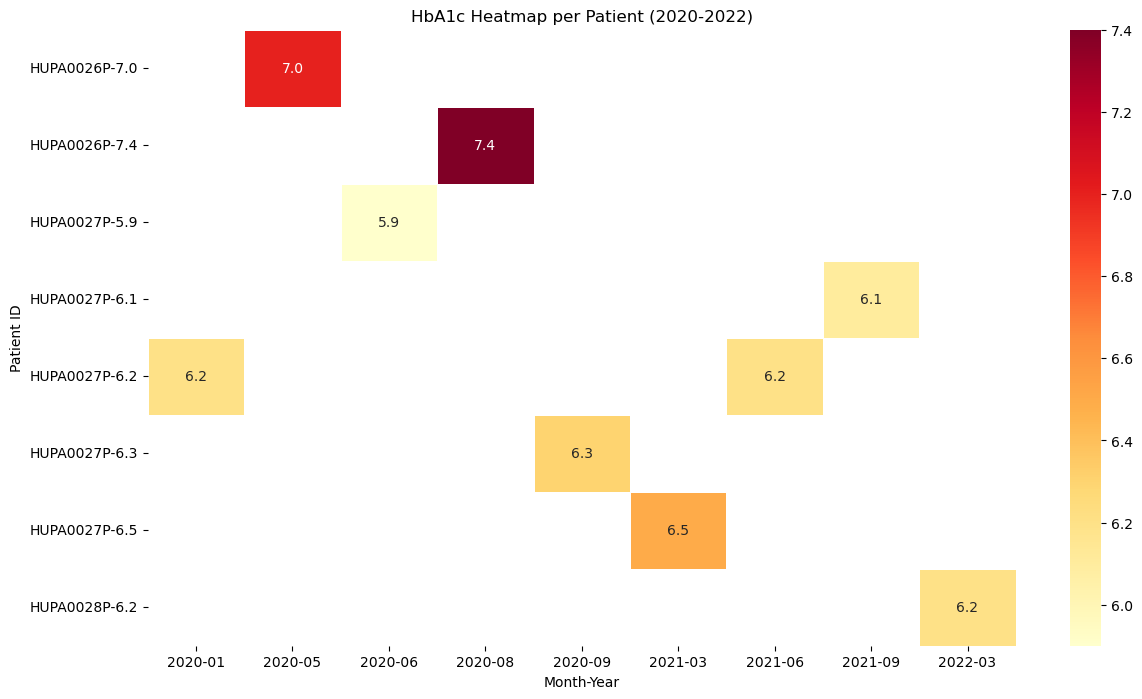

In [44]:
# Merged with demographi_df to include age and gender information
hba1c_plot_df = pd.merge(HbA1c_df,demographic_df[['patient_id','age','gender','race']],on='patient_id',how="inner")

# Create new column to convert year + month into continuous number
# .apply() method used to apply a function to each row of a DataFrame 
# to perform custom operations without writing explicit loops.
hba1c_plot_df['year_month'] = hba1c_plot_df['year'].astype(str)+'-'+ hba1c_plot_df['months'].apply(lambda x:str(x[0]).zfill(2))

# For visualization, sort by Year-Month
hba1c_plot_df = hba1c_plot_df.sort_values(['patient_id','year_month']).reset_index(drop=True)


# Pivot table: rows=patient_id, columns=year_month, values=HbA1c
heatmap_df = hba1c_plot_df.pivot(index=['patient_id','HbA1c'], columns='year_month', values='HbA1c')

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap='YlOrRd', linewidths=.5)
plt.title("HbA1c Heatmap per Patient (2020-2022)")
plt.ylabel("Patient ID")
plt.xlabel("Month-Year")
plt.show()

***Q9. What is the average sleep quality and average sleep duration of participants?***
**Reasoning:**
**Sleep affects glucose metabolism and insulin sensitivity. Understanding baseline sleep metrics helps contextualize glucose trends.**

In [ ]:

# Average sleep metrics
sleep_avg = df.groupby('patient_id')[['avg_sleep_duration_hrs', 'sleep_quality_score']].first().mean()
print(sleep_avg.round(2))

if sleep_avg['avg_sleep_duration_hrs']<7:
    print("\n Participants are sleep-deprived, which may affect glucose control, insulin sensitivity, heart health, and overall well-being")
elif sleep_avg['Average Sleep Duration (hrs)']>7 and sleep_avg['Average Sleep Duration (hrs)']<9:
    print("\n Participants are getting adequate sleep")
if sleep_avg['sleep_quality_score']<6:
    print("\n Participants sleep quality is moderate. Poor sleep quality can contribute to higher glucose variability, fatigue, and worse metabolic outcomes.")
elif sleep_avg['sleep_quality_score']>6:
    print ("\n Particants sleep quality is good")

***Q10. How many participants belong to each race?***

**Reasoning:**
**Race can influence risk factors and glucose variability; it is important for stratified analyses.**

In [ ]:

race_counts = df.groupby('patient_id')['race'].first().value_counts()
print(race_counts)
print(f"\nThe most common participant ethnicity is {race_counts.idxmax()}")
print(f"\nThe least common participant ethnicity is {race_counts.idxmin()}")



***Q11.What is the average basal rate by hour of day?***

**Reasoning:**
**Insulin pumps often follow circadian rhythms — lower basal rates at night, higher during early morning due to dawn phenomenon.
By plotting this as a line chart, you can visually detect whether patients are receiving appropriate basal adjustments across the day.
This also helps validate whether your time-splitting logic (hour feature) is working as intended.**

In [ ]:
# Load the merged patient and demographic dataset

df_patients = pd.read_csv(all_patients_path)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'time' column is in datetime format
df_patients['time'] = pd.to_datetime(df_patients['time'])

# Extract hour from time
df_patients['hour'] = df_patients['time'].dt.hour

# Group by hour and calculate average basal rate
hourly_avg = df_patients.groupby('hour')['basal_rate_cleaned'].mean().reset_index()

# Plot the average basal rate by hour
sns.lineplot(data=hourly_avg, x='hour', y='basal_rate_cleaned', marker='o')
plt.title('Average Basal Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Basal Rate (U/hr)')
plt.grid(True)
plt.tight_layout()
plt.show()

***Q12.How does Glucose levels of the patients vary accross weekdays?***
**Reasoning:**
**Lifestyle factors (diet, stress, sleep) often fluctuate across the week — weekends may show higher glucose due to irregular routines.
This question helps uncover behavioral patterns and can inform personalized education or intervention strategies.
It also validates your dayofweek feature engineering and gives a quick sanity check on data coverage across days.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert 'time' column to datetime
df_patients['datetime'] = pd.to_datetime(df_patients['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Step 2: Extract day of week (0 = Monday, 6 = Sunday)
df_patients['dayofweek'] = df_patients['datetime'].dt.dayofweek

# Step 3: Group and calculate average glucose
weekday_avg = df_patients.groupby('dayofweek', as_index=False)['glucose'].mean()
weekday_avg['glucose'] = weekday_avg['glucose'].round(1)

# Step 4: Map numeric day to weekday name
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_avg['day_name'] = weekday_avg['dayofweek'].map(dict(enumerate(weekday_names)))

# Step 5: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_avg, x='day_name', y='glucose', palette='coolwarm')
plt.title('Average Glucose by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Glucose (mg/dL)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


***Q13.What is the most common hour of the day for glucose spikes across all patients?***
**Reasoning:**
**Identifying peak glucose hours helps uncover behavioral or physiological patterns — such as post-meal spikes or medication timing effects. This insight can guide personalized scheduling for interventions or alerts..**

In [ ]:
import pandas as pd

# === Step 1: Convert 'time' column to datetime ===
df_patients['datetime'] = pd.to_datetime(df_patients['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# === Step 2: Extract hour from datetime ===
df_patients['hour'] = df_patients['datetime'].dt.hour

# === Step 3: Group by hour and calculate average glucose ===
glucose_by_hour = (
    df_patients
    .dropna(subset=['glucose'])
    .groupby('hour')['glucose']
    .mean()
)

# === Step 4: Identify peak hour ===
peak_hour = glucose_by_hour.idxmax()
peak_value = glucose_by_hour.max()

# === Step 5: Print results ===
print("\nQ. What is the most common hour of the day for glucose spikes across all patients?")
print("-" * 90)
print(f"Highest average glucose occurs at hour: {peak_hour}:00")
print(f"Average glucose at that hour: {peak_value:.2f} mg/dL")

print("\nReasoning: Identifying the hour with peak glucose levels helps uncover behavioral or physiological patterns—")
print("such as post-meal spikes or medication timing effects. This insight can guide personalized scheduling for")
print("interventions, alerts, or lifestyle adjustments.")


***Q14.Which patient has the highest variability in heart rate, and what might that indicate?***
**Reasoning:**
**High variability may signal stress, inconsistent sleep, or cardiovascular irregularities. 
Flagging such patients enables targeted review and potential clinical follow-up.**

In [ ]:
# Calculate heart rate variability
hr_variability = df_patients.groupby('patient_id')['heart_rate'].std()
most_variable_patient = hr_variability.idxmax()
highest_std = hr_variability.max()

# Print the result
print("\nQ. Which patient shows the highest heart rate variability?")
print("-" * 80)
print(f"Patient ID with highest variability: {most_variable_patient}")
print(f"Standard deviation of heart rate: {highest_std:.2f} bpm")

print("\nReasoning: High heart rate variability may indicate fluctuating stress levels, autonomic imbalance,")
print("or inconsistent measurement conditions. Identifying such patients can help flag cases for deeper")
print("clinical review or personalized monitoring strategies.")
